
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Alemanha
* Itália   
* Russia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [2]:
new = True

In [3]:
if new:    
    read()

---

In [4]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [5]:
dados_grupo = dados.groupby('Pais')

In [6]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Mortes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
363,04/09/2020,4091801,125502,Brasil,171,3.956996e+06,122709.000000,39549.571429,848.714286,31199.0,701.0,3.07,3.07
364,05/09/2020,4123000,126203,Brasil,172,3.996545e+06,123557.714286,39315.714286,831.714286,14521.0,447.0,3.06,3.06
365,06/09/2020,4137521,126650,Brasil,173,4.035861e+06,124389.428571,34217.428571,797.000000,10273.0,310.0,3.06,3.06
366,07/09/2020,4147794,126960,Brasil,174,4.070079e+06,125186.428571,30163.142857,695.428571,14279.0,504.0,3.06,3.06
367,08/09/2020,4162073,127464,Brasil,175,4.100242e+06,125881.857143,28574.857143,679.857143,35816.0,1075.0,3.06,3.06
368,09/09/2020,4197889,128539,Brasil,176,4.128817e+06,126561.714286,28115.428571,701.142857,40557.0,983.0,3.06,3.06
369,10/09/2020,4238446,129522,Brasil,177,4.156932e+06,127262.857143,27194.714286,699.142857,43718.0,874.0,3.06,3.06
370,11/09/2020,4282164,130396,Brasil,178,4.184127e+06,127962.000000,27526.714286,715.285714,33523.0,814.0,3.05,3.05
371,12/09/2020,4315687,131210,Brasil,179,4.211653e+06,128677.285714,27562.000000,710.714286,14768.0,415.0,3.04,3.04
372,13/09/2020,4330455,131625,Brasil,180,4.239215e+06,129388.000000,NaN,NaN,NaN,NaN,3.04,3.04


In [7]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
#paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
#paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
paises = ['USA', 'Brasil', 'India']
paises_sem = ['Brasil', 'USA', 'India']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':      'green',
         'India'   :      'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6,
         'India'   :      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p',
         'India'   :      'p'}

#
lw = { 'Brasil'   :     3,
        'USA'     :     1,
        'Itália'  :     1,
        'Espanha' :     1,
        'Russia'  :     1,
        'Alemanha':     1,
        'India'   :     1}

# divisao do eixo x
#x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

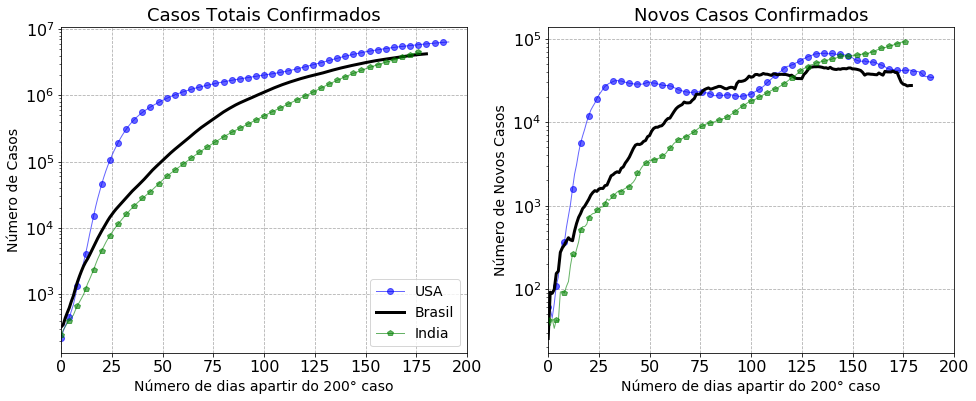

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 200)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 200)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [10]:
fig.savefig('casos.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

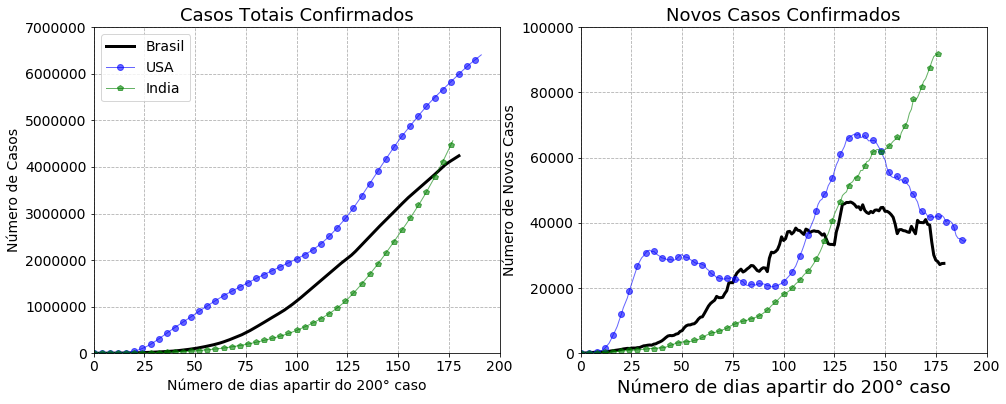

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(14)

ax1.set_xlim(0, 200)
ax1.set_ylim(0, 7000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(14)
    
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 100000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

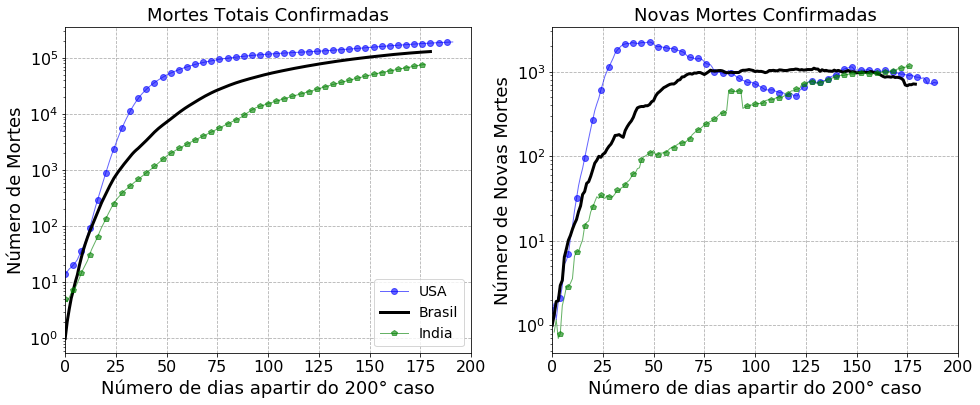

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 200)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 200)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [22]:
fig.savefig('mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

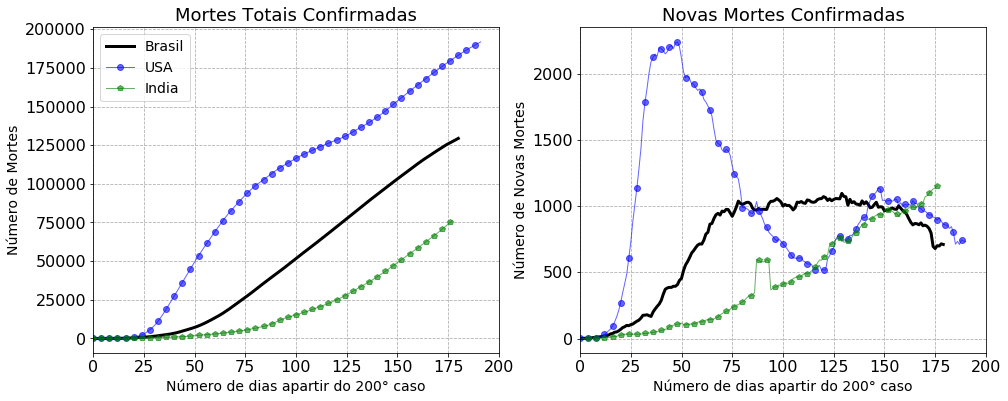

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 200)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 200)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


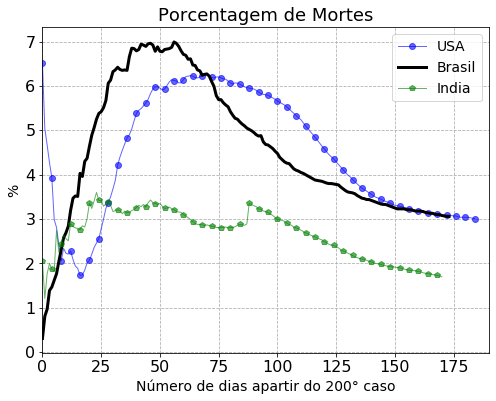

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 200)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper right', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [25]:
fig.savefig('porcentagem_de_mortos.png', dpi = 300)

---
---